In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
#Import eQTL 95 and FPKM files for BRCA

FPKM_file = '/Users/jake/OneDrive - University of Glasgow/Project/BRCA/GeneExpression_MAF/BRCA_FPKM_protein_all_matched.csv'
FPKM_protein = pd.read_csv(FPKM_file,sep='\t',header=[0,1],index_col=[0])


#Add path to eQTL files
path = r'/Users/jake/OneDrive - University of Glasgow/Project/BRCA/Machine_learning_final/Pipeline/Data_parsing_4_eQTLs'

all_files = glob.glob(path + "/*.csv")

#For loop to read in eQTL files        
for filename in all_files:
    
    if 'cis_eQTL_95_ensembl' in filename:
        cis_eQTL_95 = pd.read_csv(filename,sep='\t',index_col=0)
    elif 'trans_eQTL_95_ensembl' in filename:
        trans_eQTL_95 = pd.read_csv(filename, sep='\t',index_col=0)
   

In [3]:
#Reset index
cis_eQTL_95.reset_index(drop=True)
trans_eQTL_95.reset_index(drop=True)

,Gene_symbol,Entrez_ID,Value_count,ensembl_gene_id,chromosome_name
0,FOLH1B,219595,6069,ENSG00000134612,11
1,LOC647121,647121,1732,ENSG00000231752,1
2,BTN3A2,11118,634,ENSG00000186470,6
3,TYW1B,441250,556,ENSG00000277149,7
4,ZFP57,346171,513,ENSG00000204644,6
...,...,...,...,...,...
288,RNF5P1,286140,592,ENSG00000253570,8
289,RPL23AP53,644128,127,ENSG00000223508,8
290,FKBP1AP1,2282,98,ENSG00000269304,19
291,CCT6P1,643253,59,ENSG00000228409,7


In [4]:
FPKM_protein.head()

Gene_symbol,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
Gene_ensembl_id,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000166535,ENSG00000184389,ENSG00000128274,ENSG00000118017,ENSG00000094914,ENSG00000081760,ENSG00000114771,...,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
TCGA-BH-A1FN,0.208011,0.009381,43.292960,0.055509,0.110075,3.581380,0.038150,5.007168,1.640055,0.000000,...,13.323137,4.351933,24.207158,1.127985,3.549771,7.245900,2.346176,12.914487,41.879917,3.253812
TCGA-E9-A1NG,0.108386,0.004110,178.373384,0.327900,0.000000,7.944528,0.022288,7.198746,2.232691,0.000000,...,6.468774,4.018591,7.967490,0.985287,2.102866,2.553868,0.058864,6.947852,67.347728,2.725455
TCGA-AC-A23H,0.020294,0.002822,37.866925,0.395196,0.000000,1.740345,0.007651,8.431803,6.124952,0.032494,...,8.147105,3.705314,20.387417,1.722966,7.227800,7.604626,0.825575,6.627812,70.866135,5.747454
TCGA-A7-A0DC,0.660110,0.131949,55.782077,0.746827,0.269265,1.928116,0.217754,9.173075,4.806061,1.023887,...,5.708031,2.624497,2.756902,2.866430,6.842064,14.519888,0.246469,6.343812,17.736301,17.258228
TCGA-BH-A0BA,0.146119,0.014777,123.459875,0.240457,0.000000,3.357131,0.040063,10.716496,23.238758,0.510444,...,9.728599,6.127255,20.796211,2.328833,5.314763,4.388074,1.277253,6.348272,45.638784,5.031597


In [5]:
#Check for number cis_eQTL genes not present in FPKM_protein 

display(len(list(set(cis_eQTL_95['ensembl_gene_id']) - set(FPKM_protein.columns.levels[1]))))
display (len(list(set(cis_eQTL_95['Gene_symbol']) - set(FPKM_protein.columns.levels[0]) )))

44

110

In [6]:
#Create list of cis_eQTL genes / columns to keep in FPKM .. use Ensembl ID
#ADD 'Cancer' TO LIST since = target variable

cols_to_keep_cis = list(cis_eQTL_95['ensembl_gene_id'])
cols_to_keep_cis.append('Cancer')

In [7]:
#Filter FPKM for the cis_eQTL_95 genes

FPKM_cis_95 = FPKM_protein.loc(axis=1)[:, cols_to_keep_cis]

In [8]:
FPKM_cis_95

Gene_symbol,ZNF117,BTN3A2,TYW1,C2orf74,ZNF781,ZSCAN23,NUDT2,GYPE,WFDC3,MANBA,...,RNASET2,PAX8,SLC5A11,MAATS1,NDUFA10,SNX16,PNPT1,TMEM115,UPK3B,Cancer
Gene_ensembl_id,ENSG00000152926,ENSG00000186470,ENSG00000198874,ENSG00000237651,ENSG00000196381,ENSG00000187987,ENSG00000164978,ENSG00000197465,ENSG00000124116,ENSG00000109323,...,ENSG00000026297,ENSG00000125618,ENSG00000158865,ENSG00000183833,ENSG00000130414,ENSG00000104497,ENSG00000138035,ENSG00000126062,ENSG00000243566,Cancer
TCGA-BH-A1FN,7.120216,4.985915,7.126943,0.460833,0.479443,0.233240,8.484795,0.089906,0.636779,8.392460,...,6.479719,0.143041,0.428664,1.324786,6.583425,2.960510,10.835174,11.768108,0.084667,1
TCGA-E9-A1NG,1.433767,8.839503,5.993562,1.198498,0.560200,0.112217,10.685053,0.190402,0.519732,8.067247,...,6.713850,0.652537,0.015411,0.631393,8.841204,2.485926,5.548466,22.074770,0.103874,1
TCGA-AC-A23H,1.527223,1.443108,5.757805,0.447189,0.074923,0.053655,16.385836,0.094659,0.191557,11.752712,...,5.295477,0.554810,0.210290,0.404245,12.745408,2.310231,7.199830,19.680244,0.081503,1
TCGA-A7-A0DC,3.617470,3.622190,9.517127,1.490931,0.594022,0.855826,17.065616,1.072144,1.649315,6.836674,...,7.215334,6.782236,1.742285,4.636200,13.314166,2.198888,7.050107,8.400419,0.497068,1
TCGA-BH-A0BA,5.287703,8.654868,9.662392,1.885023,0.235394,0.464655,19.354985,0.079661,0.177011,9.000372,...,14.681439,0.148615,0.373977,0.312024,9.322812,5.332927,5.223953,22.574098,0.100026,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-E9-A1N5,3.111718,9.757594,7.033362,2.330930,0.538346,0.965069,21.306349,0.131750,0.205842,5.452966,...,4.439022,0.338953,0.009664,0.534110,11.051978,2.763404,6.698382,18.477069,0.086851,0
TCGA-BH-A1FG,3.279355,5.861261,4.467821,1.154882,1.147128,0.065983,8.711419,0.457326,0.069286,3.290395,...,2.119159,0.463870,0.004879,1.421047,5.812983,4.503790,5.725373,11.437532,0.062644,0
TCGA-BH-A1EO,3.067988,10.596617,4.420259,2.639467,1.270040,0.056445,24.360201,0.798162,0.348761,5.282910,...,4.280005,1.005629,0.051408,0.155095,6.794516,5.752456,4.331358,20.611693,0.219996,0


In [9]:
### Repeat for trans_eQTL

In [10]:
#Check number of cis_eQTL genes not present in FPKM_protein 

display(len(list(set(trans_eQTL_95['ensembl_gene_id']) - set(FPKM_protein.columns.levels[1]))))
display (len(list(set(trans_eQTL_95['Gene_symbol']) - set(FPKM_protein.columns.levels[0]) )))

9

38

In [11]:
#Create list of trans_eQTL genes / columns to keep in FPKM ... use Ensembl ID
#ADD 'Cancer' TO LIST since = target variable

cols_to_keep_trans = list(trans_eQTL_95['ensembl_gene_id'])
cols_to_keep_trans.append('Cancer')

In [12]:
#Filter FPKM for the cis_eQTL_95 genes

FPKM_trans_95 = FPKM_protein.loc(axis=1)[:, cols_to_keep_trans]

In [13]:
FPKM_trans_95

Gene_symbol,BTN3A2,TYW1B,ZFP57,CCAR2,CNOT7,XPO7,ERI1,BIN3,INTS10,MCPH1,...,RNF185,SERINC1,BIRC2,TBCEL,RNF6,ZBTB44,EBPL,DPAGT1,NUP50,Cancer
Gene_ensembl_id,ENSG00000186470,ENSG00000277149,ENSG00000204644,ENSG00000158941,ENSG00000198791,ENSG00000130227,ENSG00000104626,ENSG00000147439,ENSG00000104613,ENSG00000147316,...,ENSG00000138942,ENSG00000111897,ENSG00000110330,ENSG00000154114,ENSG00000127870,ENSG00000196323,ENSG00000123179,ENSG00000172269,ENSG00000093000,Cancer
TCGA-BH-A1FN,4.985915,0.767303,0.681195,6.883253,10.086561,15.108778,3.089854,1.105643,5.632802,2.354664,...,10.898069,168.231835,19.693775,3.310834,11.531175,2.849830,13.843135,10.885329,11.666817,1
TCGA-E9-A1NG,8.839503,3.493300,0.251026,14.641512,8.756788,13.818248,2.919980,2.806848,7.194539,2.354203,...,10.088504,114.977526,16.838717,3.789788,9.777667,3.041201,17.069566,6.267221,5.694486,1
TCGA-AC-A23H,1.443108,2.611814,14.369499,6.020071,3.484347,7.095567,1.971463,0.729318,3.726252,0.946755,...,19.182812,111.577657,12.996711,5.425721,10.297985,4.551728,12.185810,11.258160,14.745495,1
TCGA-A7-A0DC,3.622190,1.623328,0.000000,5.935807,4.989114,11.243205,1.432298,3.063064,5.269362,3.505580,...,16.605826,44.853113,6.564325,5.360062,10.396011,11.321261,6.721188,3.109342,17.531587,1
TCGA-BH-A0BA,8.654868,2.651436,0.016508,26.720935,11.521640,14.336182,5.881164,4.553392,6.936107,3.560291,...,13.564613,121.892533,14.254544,4.037783,11.093413,7.525039,11.943550,6.883532,7.962670,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-E9-A1N5,9.757594,1.266243,0.092145,16.481471,8.918113,16.733353,2.956604,2.550732,9.095260,3.636277,...,13.567087,80.630436,18.351378,5.162063,9.698885,9.354463,23.234359,8.788392,7.606086,0
TCGA-BH-A1FG,5.861261,0.383593,0.015508,5.812009,15.530386,12.857441,4.449637,0.854191,8.209144,2.868986,...,13.153711,158.452752,21.777744,3.852498,11.203826,9.211630,43.991116,11.582257,7.997103,0
TCGA-BH-A1EO,10.596617,0.571778,0.000000,8.590358,7.123019,11.205751,3.487306,2.517129,8.624349,2.082336,...,13.094747,155.021350,13.375077,3.490017,9.115747,4.301030,15.481505,5.827879,5.233028,0


In [14]:
#Write the filtered FPKM dataframes to csv

FPKM_cis_95.to_csv(path.split('/')[5]+'_FPKM_cis_eQTL_95_matched.csv',sep='\t')
FPKM_trans_95.to_csv(path.split('/')[5]+'_FPKM_trans_eQTL_95_matched.csv',sep='\t')

In [ ]:
#### Additional data exploration #####

In [15]:
#Create boolean for tumour and normal samples

cancer_value_cis = FPKM_cis_95[("Cancer", "Cancer")] == 1
normal_value_cis = FPKM_cis_95[("Cancer", "Cancer")] == 0

cancer_value_trans = FPKM_trans_95[("Cancer", "Cancer")] == 1
normal_value_trans = FPKM_trans_95[("Cancer", "Cancer")] == 0

#Input corresponding boolean to create new cancer and normal dataframes

FPKM_cis_cancer = FPKM_cis_95[cancer_value_cis]
FPKM_cis_normal = FPKM_cis_95[normal_value_cis]

FPKM_trans_cancer = FPKM_trans_95[cancer_value_trans]
FPKM_trans_normal = FPKM_trans_95[normal_value_trans]

#Drop the cancer column from the cancer and normal FPKM tables for plotting

FPKM_cis_normal.drop('Cancer',axis=1,level=0,inplace=True)
FPKM_cis_cancer.drop('Cancer',axis=1,level=0,inplace=True)

FPKM_trans_cancer.drop('Cancer',axis=1,level=0,inplace=True)
FPKM_trans_normal.drop('Cancer',axis=1,level=0,inplace=True)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
### Mean difference plots ### 

#Starting with cis eQTLs

In [17]:
#Get mean difference between cancer and normal cis FPKM - this series will be used for plot

mean_dif_cis = (FPKM_cis_cancer.mean() - FPKM_cis_normal.mean())
mean_dif_cis

Gene_symbol  Gene_ensembl_id
ZNF117       ENSG00000152926    1.144497
BTN3A2       ENSG00000186470   -0.542390
TYW1         ENSG00000198874    1.341736
C2orf74      ENSG00000237651   -0.912331
ZNF781       ENSG00000196381   -0.508399
                                  ...   
NDUFA10      ENSG00000130414   -0.263395
SNX16        ENSG00000104497    0.454048
PNPT1        ENSG00000138035    2.260614
TMEM115      ENSG00000126062    0.322685
UPK3B        ENSG00000243566    0.399157
Length: 525, dtype: float64

In [18]:
#Now create dataframe with absolute difference - this will be used for plot labelling

mean_dif_cis_abs_df = abs(FPKM_cis_cancer.mean() - FPKM_cis_normal.mean()).to_frame('Absolute_Mean_FPKM_difference_cancer_vs_normal')

#Reset the index to only include Gene_symbol
mean_dif_cis_abs_df.reset_index(level='Gene_ensembl_id',inplace=True)

In [19]:
#Get list of top genes with highest mean_FPKM_differnece via index ( = Gene_symbol symbol) 

top_genes_list_cis = mean_dif_cis_abs_df.sort_values(by='Absolute_Mean_FPKM_difference_cancer_vs_normal',ascending=False).head(10).index

#Now get index positions of these genes, using enumerate, for xtick positions

xticks_cis = [i for i,x in enumerate (mean_dif_cis_abs_df.index) if x in top_genes_list_cis]

In [20]:
#Create a dataframe only containing the genes with greatest FPKM mean difference
#the index of these will be used as xtick labels

xticks_cis_df = mean_dif_cis_abs_df[mean_dif_cis_abs_df.index.isin(top_genes_list_cis)]

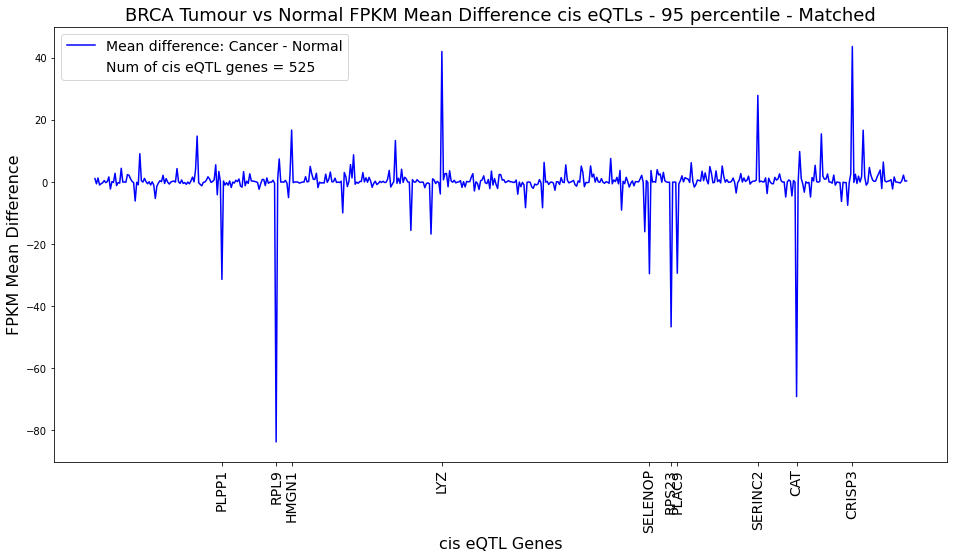

In [21]:
#Plot for mean FPKM difference between tumour and normal samples for cis eQTLs

ax = mean_dif_cis.plot(label='Mean difference: Cancer - Normal',color='blue',figsize=(16,8))

ax.plot([], [], ' ',label= 'Num of cis eQTL = ' + str(len(mean_dif_cis)))

ax.legend(['Mean difference: Cancer - Normal','Num of cis eQTL genes = ' + str(len(mean_dif_cis))],fontsize=14)
ax.set_xlabel('cis eQTL Genes',fontsize=16)
ax.set_xticks(xticks_cis)
ax.set_xticklabels(xticks_cis_df.index,fontsize=14,rotation=90)
ax.set_ylabel('FPKM Mean Difference',fontsize=16)
ax.set_title(path.split('/')[5] + ' Tumour vs Normal FPKM Mean Difference cis eQTLs - 95 percentile - Matched',fontsize=18)

ax.figure.savefig(path.split('/')[5]+ '_Tumour_vs_Normal_FPKM_Mean_Difference_cis_eQTL_95_percentile_matched.png')

In [22]:
#Repeat process for trans eQTLs

In [23]:
#Get mean difference between cancer and normal trans FPKM - this series will be used for plot

mean_dif_trans = (FPKM_trans_cancer.mean() - FPKM_trans_normal.mean())
mean_dif_trans

Gene_symbol  Gene_ensembl_id
BTN3A2       ENSG00000186470   -0.542390
TYW1B        ENSG00000277149    0.072487
ZFP57        ENSG00000204644   -0.091892
CCAR2        ENSG00000158941   -0.053470
CNOT7        ENSG00000198791   -0.115250
                                  ...   
RNF6         ENSG00000127870    1.439523
ZBTB44       ENSG00000196323   -2.346448
EBPL         ENSG00000123179    2.010027
DPAGT1       ENSG00000172269    2.789600
NUP50        ENSG00000093000    2.078678
Length: 284, dtype: float64

In [24]:
#Now create dataframe with absolute difference - this will be used for plot labelling

mean_dif_trans_abs_df = abs(FPKM_trans_cancer.mean() - FPKM_trans_normal.mean()).to_frame('Absolute_Mean_FPKM_difference_cancer_vs_normal')

#Reset the index to only include Gene_symbol
mean_dif_trans_abs_df.reset_index(level='Gene_ensembl_id',inplace=True)

In [25]:
#Get list of top genes with highest mean_FPKM_differnece via index ( = Gene_symbol symbol) 

top_genes_list_trans = mean_dif_trans_abs_df.sort_values(by='Absolute_Mean_FPKM_difference_cancer_vs_normal',ascending=False).head(10).index

#Now get index positions of these genes, using enumerate, for xtick positions

xticks_trans = [i for i,x in enumerate (mean_dif_trans_abs_df.index) if x in top_genes_list_trans]

In [26]:
#Create a dataframe only containing the genes with greatest FPKM mean difference
#the index of these will be used as xtick labels

xticks_trans_df = mean_dif_trans_abs_df[mean_dif_trans_abs_df.index.isin(top_genes_list_trans)]

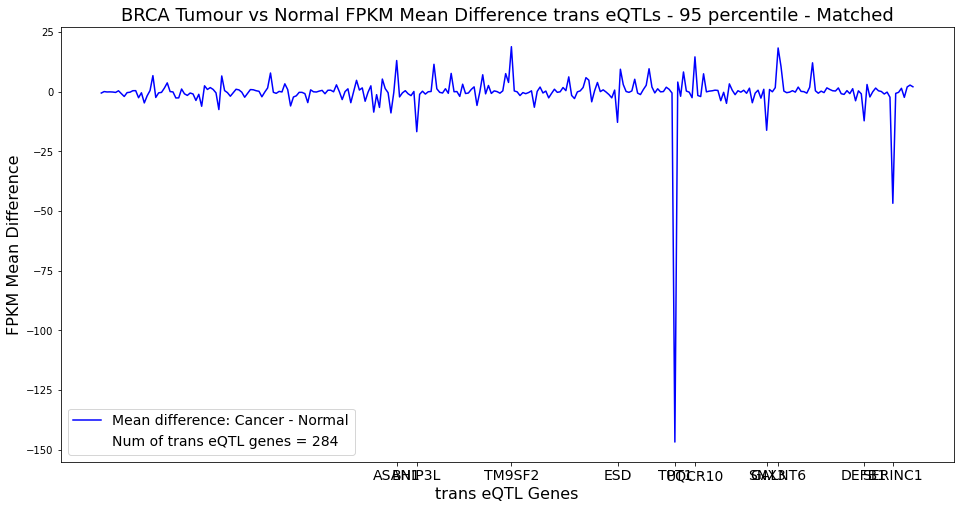

In [27]:
#Plot for mean FPKM difference between tumour and normal samples for trans eQTLs

ax = mean_dif_trans.plot(label='Mean difference: Cancer - Normal',color='blue',figsize=(16,8))

ax.plot([], [], ' ',label= 'Num of trans eQTL = ' + str(len(mean_dif_trans)))

ax.legend(['Mean difference: Cancer - Normal','Num of trans eQTL genes = ' + str(len(mean_dif_trans))],fontsize=14)
ax.set_xlabel('trans eQTL Genes',fontsize=16)
ax.set_xticks(xticks_trans)
ax.set_xticklabels(xticks_trans_df.index,fontsize=14)
ax.set_ylabel('FPKM Mean Difference',fontsize=16)
ax.set_title(path.split('/')[5] + ' Tumour vs Normal FPKM Mean Difference trans eQTLs - 95 percentile - Matched',fontsize=18)

ax.figure.savefig(path.split('/')[5]+ '_Tumour_vs_Normal_FPKM_Mean_Difference_trans_eQTL_95_percentile_matched.png')

In [28]:
#Now create plots comparing tumour to normal FPKM mean values on same plot 

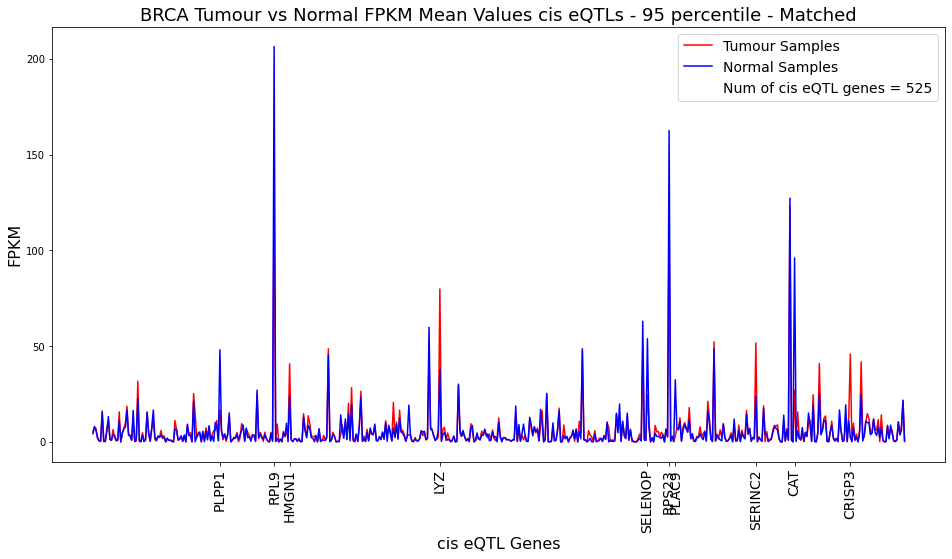

In [29]:
#cis eQTL plot

ax = FPKM_cis_cancer.mean().plot(label='Tumour',color = 'red',figsize=(16,8))
FPKM_cis_normal.mean().plot(ax=ax,label='Normal',color = 'blue')
ax.plot([], [], ' ',label= 'Num of cis eQTL genes = ' + str(len(FPKM_cis_cancer.columns)))

ax.legend(['Tumour Samples','Normal Samples','Num of cis eQTL genes = ' + str(len(FPKM_cis_cancer.columns))],fontsize=14)
ax.set_xlabel('cis eQTL Genes',fontsize=16)
ax.set_xticks(xticks_cis)
ax.set_xticklabels(xticks_cis_df.index,fontsize=14,rotation = 90)
ax.set_ylabel('FPKM',fontsize=16)
ax.set_title(path.split('/')[5] + ' Tumour vs Normal FPKM Mean Values cis eQTLs - 95 percentile - Matched',fontsize=18)

ax.figure.savefig(path.split('/')[5] + '_Tumour_vs_Normal_FPKM_Distrbution_cis_eQTL_95_percentile_matched.png')

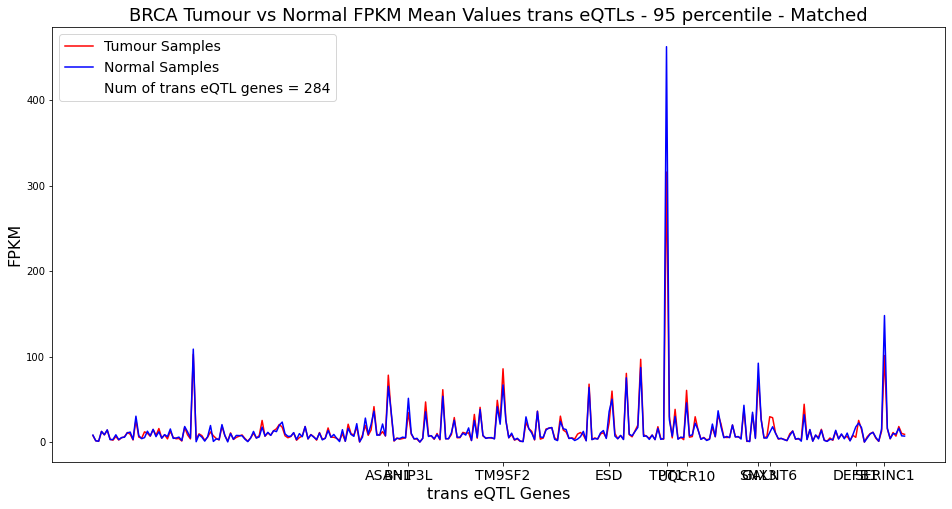

In [30]:
#trans eQTL plot

ax = FPKM_trans_cancer.mean().plot(label='Tumour',color = 'red',figsize=(16,8))
FPKM_trans_normal.mean().plot(ax=ax,label='Normal',color = 'blue')
ax.plot([], [], ' ',label= 'Num of trans eQTL genes = ' + str(len(FPKM_trans_cancer.columns)))

ax.legend(['Tumour Samples','Normal Samples','Num of trans eQTL genes = ' + str(len(FPKM_trans_cancer.columns))],fontsize=14)
ax.set_xlabel('trans eQTL Genes',fontsize=16)
ax.set_xticks(xticks_trans)
ax.set_xticklabels(xticks_trans_df.index,fontsize=14)
ax.set_ylabel('FPKM',fontsize=16)
ax.set_title(path.split('/')[5] + ' Tumour vs Normal FPKM Mean Values trans eQTLs - 95 percentile - Matched',fontsize=18)

ax.figure.savefig(path.split('/')[5] + '_Tumour_vs_Normal_FPKM_Distrbution_trans_eQTL_95_percentile_macthed.png')

Text(0.5, 1.0, 'BRCA Tumour vs Normal Absolute FPKM Mean Difference cis eQTLs - 95 percentile ')

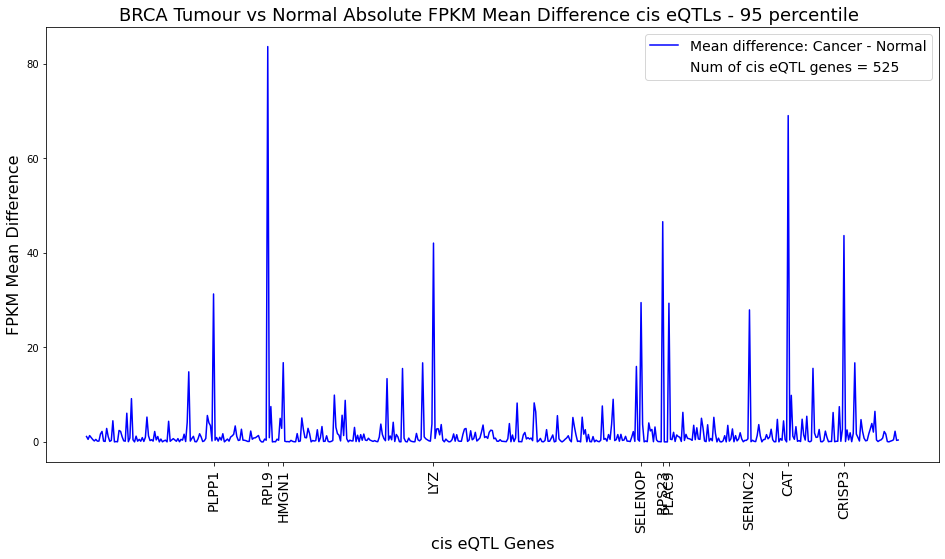

In [31]:
#Plot for absolute mean FPKM difference between tumour and normal samples for cis eQTLs

ax = abs(mean_dif_cis).plot(label='Mean difference: Cancer - Normal',color='blue',figsize=(16,8))

ax.plot([], [], ' ',label= 'Num of cis eQTL = ' + str(len(mean_dif_cis)))

ax.legend(['Mean difference: Cancer - Normal','Num of cis eQTL genes = ' + str(len(mean_dif_cis))],fontsize=14)
ax.set_xlabel('cis eQTL Genes',fontsize=16)
ax.set_xticks(xticks_cis)
ax.set_xticklabels(xticks_cis_df.index,fontsize=14,rotation=90)
ax.set_ylabel('FPKM Mean Difference',fontsize=16)
ax.set_title(path.split('/')[5] + ' Tumour vs Normal Absolute FPKM Mean Difference cis eQTLs - 95 percentile ',fontsize=18)

#ax.figure.savefig(path.split('/')[5]+ '_Tumour_vs_Normal_FPKM_Mean_Difference_cis_eQTL_95_percentile.png')